In [2]:
# Package imports
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe

import scipy.stats as stats                         # Statistical tests
from sklearn.linear_model import LinearRegression   # Linear regression model

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/number_of_heavily_wounded_car_accidents_VL.txt',
                  delimiter = "\t", parse_dates=['date']).set_index(['date'])
df.head()

,number_of_heavily_wounded
date,
2013-01-01,285
2013-02-01,276
2013-03-01,332
2013-04-01,381
2013-05-01,393


Sure, here's the information organized in a markdown table:

| Technique                    | When to Use                                                                                       |
|------------------------------|--------------------------------------------------------------------------------------------------|
| Linear Regression            | - Understanding the relationship between variables and making predictions based on historical data. |
|                              | - Suitable for data with clear linear trends and relationships between variables.                  |
| Simple Moving Average (SMA)  | - Smoothing out short-term fluctuations to identify long-term trends.                              |
|                              | - Useful for data with noise or irregular fluctuations.                                            |
| Simple Exponential Smoothing (SES) | - Forecasting data with no clear trend or seasonality.                                               |
|                               | - Provides weighted averages of past observations, giving more weight to recent data.                |
| Double Exponential Smoothing (DES - Holt) | - Modeling data with trend but no seasonality.                                                        |
|                                         | - Extends SES to capture trend information in addition to level (average).                             |
| Holt-Winters Method          | - Modeling data with both trend and seasonality.                                                    |
|                              | - Captures both long-term trends and seasonal variations in the data.                                |

This table summarizes when to use each time series analysis technique based on whether the data has a trend, seasonality, or both.

### Constant

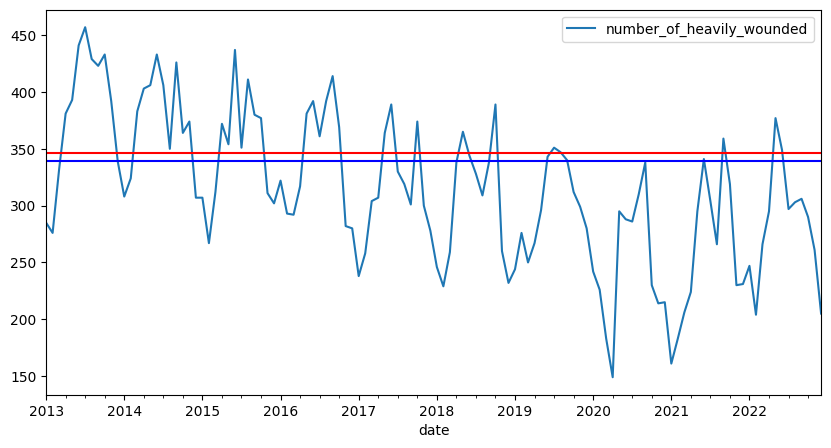

In [4]:
b_est_70 = df['number_of_heavily_wounded'].head(70).mean()
b_est_80 = df['number_of_heavily_wounded'].head(80).mean()

df.plot(y='number_of_heavily_wounded', figsize=[10,5])
plt.axhline(y=b_est_70, color='red')   # Mean of first 40 observations
plt.axhline(y=b_est_80, color='blue')  # Mean of first 50 observations

### Linear regression

y = -1.119563858601292 * x + 381.94738292011016


<Axes: ylabel='number_of_heavily_wounded'>

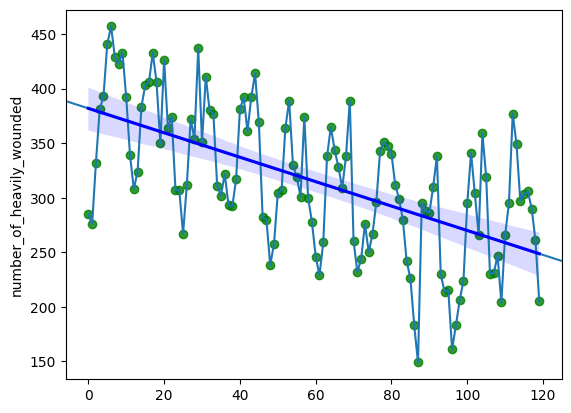

In [5]:
# Build a linear regression model
n = df['number_of_heavily_wounded'].size
wounded_lm = LinearRegression().fit(
    np.arange(0,n).reshape((-1,1)),
    df['number_of_heavily_wounded'].values
)
# plot the time series and the regression line
plt.plot(np.arange(0,n), df['number_of_heavily_wounded'])
plt.axline((0, wounded_lm.intercept_), slope=wounded_lm.coef_[0])

print(f"y = {wounded_lm.coef_[0]} * x + {wounded_lm.intercept_}")


sns.regplot(x=np.arange(0,df['number_of_heavily_wounded'].size), y=df['number_of_heavily_wounded'], 
            line_kws={'color': 'b'}, scatter_kws={'color':'g'})

### Simple moving average

<Axes: xlabel='date'>

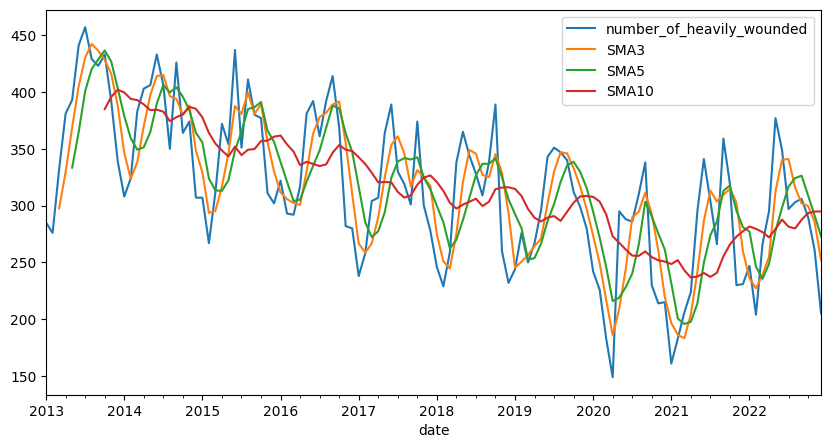

In [6]:
df['SMA3'] = df['number_of_heavily_wounded'].rolling(3).mean()
df['SMA5'] = df['number_of_heavily_wounded'].rolling(5).mean()
df['SMA10'] = df['number_of_heavily_wounded'].rolling(10).mean()

df.plot(y=['number_of_heavily_wounded', 'SMA3',	'SMA5',	'SMA10'], figsize=[10,5])

### Single exponential smoothing

when not trend and not season

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/codespace/.local/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


<Axes: xlabel='date'>

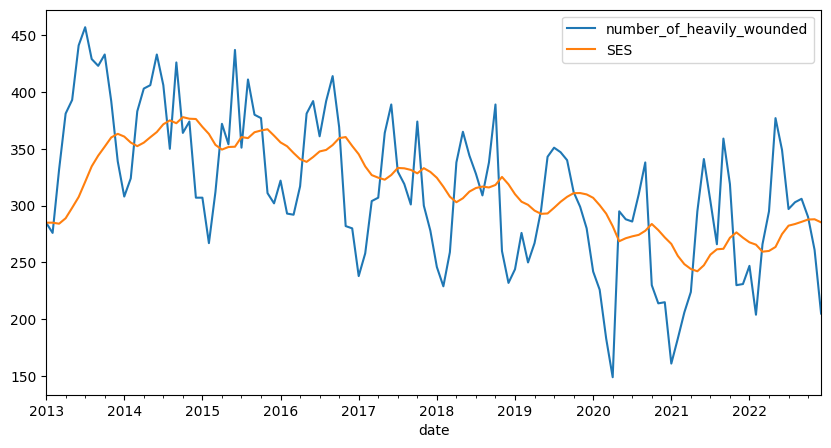

In [7]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
data_ses = SimpleExpSmoothing(df['number_of_heavily_wounded']).fit(smoothing_level=0.1)
df['SES'] = data_ses.fittedvalues
df.plot(y=['number_of_heavily_wounded',  'SES'], figsize=[10,5])



<Axes: xlabel='date'>

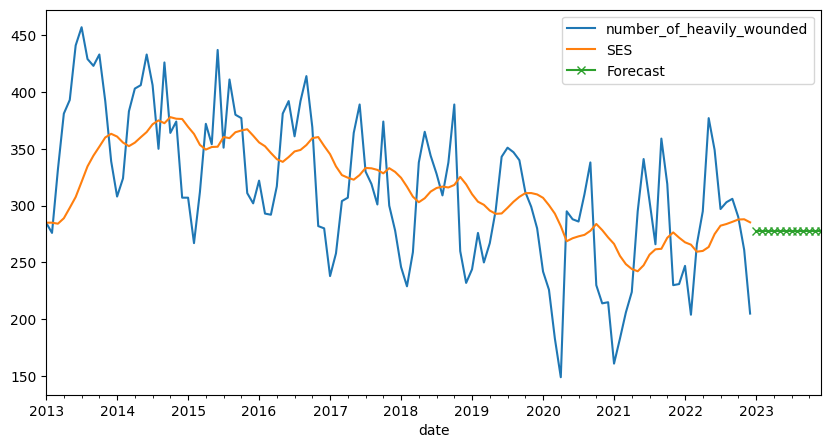

In [8]:
data_ses_fcast = data_ses.forecast(12)

df.plot(y=['number_of_heavily_wounded',  'SES'], figsize=[10,5])
data_ses_fcast.plot(marker='x', legend=True, label='Forecast')


### Double exponential smoothing (holt)
trend but no season

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/codespace/.local/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


<Axes: xlabel='date'>

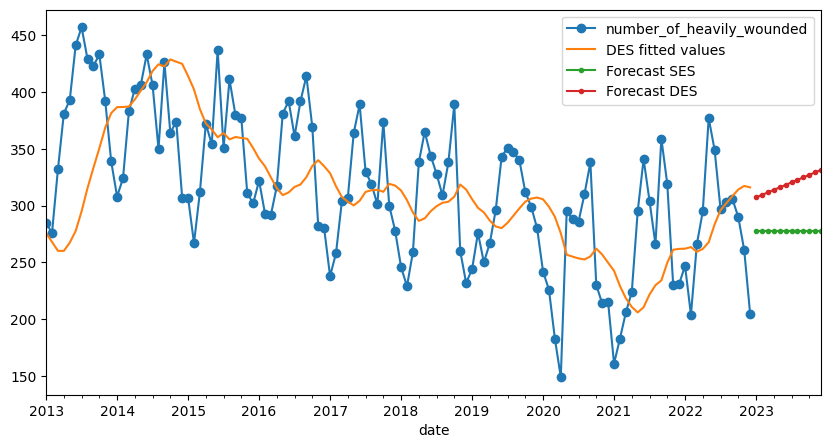

In [10]:
from statsmodels.tsa.api import Holt

# Uses the trend of previous time (bt)
# smoothing_level=.1 == alpha
# smoothing_trend=.2 == beta

data_des = Holt(df['number_of_heavily_wounded']).fit(smoothing_level=.1, smoothing_trend=.2)

# df['DES'] = data_des.fittedvalues
# df.plot(y=['number_of_heavily_wounded',  'DES'], figsize=[10,5])
# 12 = points in the future
data_des_fcast = data_des.forecast(12)
df['number_of_heavily_wounded'].plot(marker='o', legend=True) # Observations
df['DES'].plot(legend=True, label='DES fitted values', figsize=[10,5])              
data_ses_fcast.plot(marker='.', legend=True, label='Forecast SES')
data_des_fcast.plot(marker='.', legend=True, label='Forecast DES') 

### Mean absolute error


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(f'MAE = {mean_absolute_error(test,wounded_predicted)}')

print(f'MSE = {mean_squared_error(test,wounded_predicted)}')

### Triple exponential smoothing (Holt Winters)
both trend and season

<Axes: xlabel='date'>

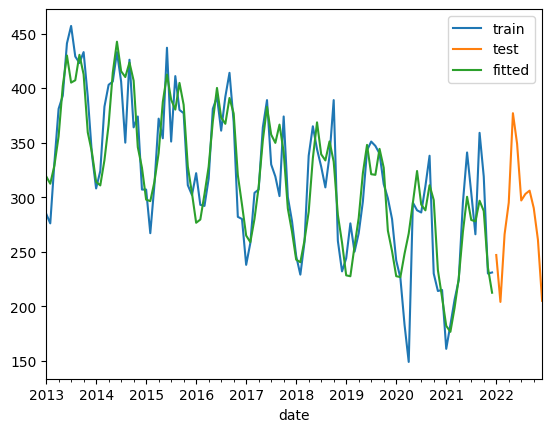

In [12]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = df.number_of_heavily_wounded[:-12]
test = df.number_of_heavily_wounded[-12:]

wounded_hw = ExponentialSmoothing(train,
  trend='add', seasonal='add',
  seasonal_periods=12, freq='MS').fit()

train.plot(legend=True, label='train')
test.plot(legend=True, label='test')
wounded_hw.fittedvalues.plot(legend=True, label='fitted')

Text(0.5, 1.0, 'Train, test, fitted & predicted values using Holt-Winters')

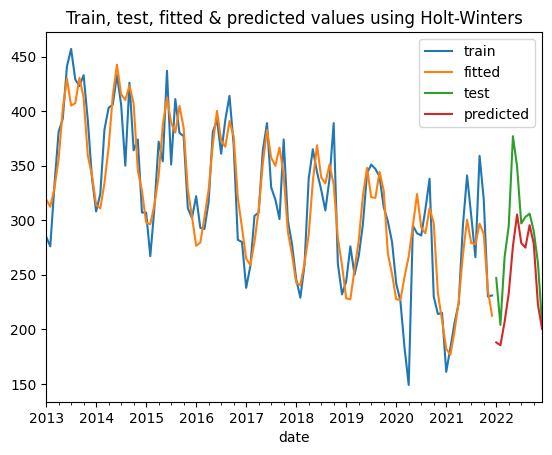

In [13]:
wounded_predicted = wounded_hw.forecast(12)

train.plot(legend=True, label='train')
wounded_hw.fittedvalues.plot(legend=True, label='fitted')

test.plot(legend=True, label='test')
wounded_predicted.plot(legend=True, label='predicted')

plt.title('Train, test, fitted & predicted values using Holt-Winters')
